# TensorFlow: Evaluating & Prediction

In [18]:
import tensorflow as tf

from tensorflow.keras import layers

from tensorflow.keras import datasets 

# Build Model

In [19]:
input_shape = (28, 28, 1)
num_classes = 10

learning_rate = 0.001

In [21]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [22]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess

데이터셋 불러오기 

In [23]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [24]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

train_x = train_x / 255.
test_x = test_x / 255.

# Training

In [31]:
num_epochs = 2
batch_size = 32

In [32]:
# GPU 디바이스 확인
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10906221366306574266,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1435228569
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10982053195008050880
 physical_device_desc: "device: 0, name: GeForce 940M, pci bus id: 0000:01:00.0, compute capability: 5.0"]

In [33]:
hist = model.fit(train_x, train_y, 
                 batch_size=batch_size, 
                 shuffle=True)

1875/1875 [==============================] - 88s 47ms/step - loss: 0.0820 - accuracy: 0.9751


In [34]:
hist.history

{'loss': [0.08195073902606964], 'accuracy': [0.9750666618347168]}

# Evaluating  
- 학습한 모델 확인

In [35]:
model.evaluate(test_x, test_y, batch_size = batch_size)

313/313 [==============================] - 8s 25ms/step - loss: 0.0374 - accuracy: 0.9878


[0.03735097870230675, 0.9878000020980835]

### 결과 확인

Input으로 들어갈 이미지 데이터 확인

In [36]:
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [37]:
test_image = test_x[0, :, :, 0]
test_image.shape

(28, 28)

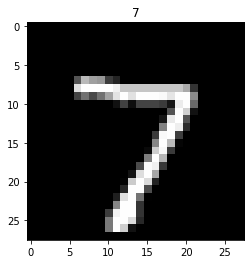

In [40]:
plt.title(test_y[0])
plt.imshow(test_image, 'gray')
plt.show()

- 모델에 Input Data로 확인 할 이미지 데이터 넣기

In [41]:
pred = model.predict(test_image.reshape(1, 28, 28, 1))
pred.shape

(1, 10)

In [42]:
pred

array([[1.5700524e-08, 1.1513350e-07, 1.7146353e-05, 5.8302321e-06,
        7.4601560e-09, 5.9729590e-09, 1.9129302e-11, 9.9997544e-01,
        4.4872063e-08, 1.4071135e-06]], dtype=float32)

- np.argmax

In [44]:
np.argmax(pred)

7

## Test Batch

Batch로 Test Dataset 넣기

In [45]:
test_batch = test_x[:32]
test_batch.shape

(32, 28, 28, 1)

Batch Test Dataset 모델에 넣기

In [46]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

- 결과 확인

In [49]:
np.argmax(preds, -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1], dtype=int64)

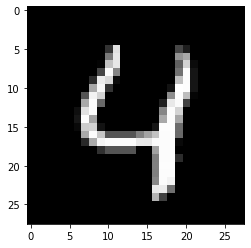

In [51]:
plt.imshow(test_batch[4, :, :, 0], 'gray')
plt.show()